In [1]:
#Importing libraries

#Essentials
import pandas as pd 
import numpy as np

#models & preprocessing tools
import sklearn
import sklearn.model_selection
import sklearn.preprocessing

# Statistics
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#graphs 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set

#ignore warnings and pd settings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

In [2]:
#loading preprocessed data

data_final = pd.read_csv('data_preprocessed.csv')
data_final = data_final.drop('Unnamed: 0', axis = 1)

data_final.head()

,year,selling_price,km_driven,owner,fuel_Diesel,seller_type_Dealer,transmission_Manual
0,0.722973,13.017003,-0.500300,2,0,0,1
1,0.722973,12.384219,-0.300267,0,0,1,1
2,-0.020709,12.206073,1.057428,0,0,0,1
3,1.218146,13.474428,-4.523633,0,0,1,0
4,-0.268849,11.775290,1.057428,0,1,0,1


In [7]:
#splitting test and train sets

from sklearn.model_selection import train_test_split

x = data_final.drop('selling_price', axis = 1)
y = data_final.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
#model selection

#A function for exploring the performance of several models:

def models(x_train, y_train):
  
  #random forest regressor 
  from sklearn.ensemble import RandomForestRegressor
  forest = RandomForestRegressor()
  forest.fit(x_train, y_train)

  #extremely randomized trees 
  from sklearn.ensemble import ExtraTreesRegressor
  extra = ExtraTreesRegressor()
  extra.fit(x_train, y_train)

  #k-nearest neighbor regressor (with uniform weights)
  from sklearn.neighbors import KNeighborsRegressor
  k_nearest_u = KNeighborsRegressor()
  k_nearest_u.fit(x_train, y_train)

  #k-nearest neighbor regressor (with distance-based weights)
  from sklearn.neighbors import KNeighborsRegressor
  k_nearest_d = KNeighborsRegressor(weights = 'distance')
  k_nearest_d.fit(x_train, y_train)

  #Support vector machine regressor (several types of kernel)
  from sklearn.svm import SVR
  svr_rbf = SVR(kernel = 'rbf')
  svr_linear = SVR(kernel = 'linear')
  svr_poly = SVR(kernel = 'poly')
  svr_rbf.fit(x_train, y_train)
  svr_linear.fit(x_train, y_train)
  svr_poly.fit(x_train, y_train)

  #Printing the training accuracy of each model: 
  print('[0]Random Forest Accuracy:', forest.score(x_train, y_train))
  print('[1]Extra Trees Accuracy:', extra.score(x_train, y_train))
  print('[2]K-Nearest Uniform Accuracy:', k_nearest_u.score(x_train, y_train))
  print('[3]K-Nearest Distance Accuracy:', k_nearest_d.score(x_train, y_train))
  print('[4]SVR Accuracy:', svr_rbf.score(x_train, y_train))
  print('[5]SVR linear Accuracy:', svr_linear.score(x_train, y_train))
  print('[6]SVR poly Accuracy:', svr_poly.score(x_train, y_train))

  return forest, extra, k_nearest_u, k_nearest_d, svr_rbf, svr_linear, svr_poly

In [9]:
#evaluating training accuracy
model = models(x_train, y_train.ravel())

[0]Random Forest Accuracy: 0.889793418921609
[1]Extra Trees Accuracy: 0.9147903675199582
[2]K-Nearest Uniform Accuracy: 0.7673129331968578
[3]K-Nearest Distance Accuracy: 0.910267294758325
[4]SVR Accuracy: 0.7099180895694458
[5]SVR linear Accuracy: 0.6746237917997775
[6]SVR poly Accuracy: 0.6788679424951374


In [10]:
#comparing test accuracy for the models 

for i in range(len(model)):
  test_score = model[i].score(x_test, y_test)
  print('Model[{}] Testing Accuracy: {}'.format(i, test_score)) 

Model[0] Testing Accuracy: 0.7034009154351035
Model[1] Testing Accuracy: 0.665627791928772
Model[2] Testing Accuracy: 0.6715214687171003
Model[3] Testing Accuracy: 0.688481011108344
Model[4] Testing Accuracy: 0.685601194149401
Model[5] Testing Accuracy: 0.6630392509372725
Model[6] Testing Accuracy: 0.6621304784705087


In [11]:
#random forest regressor seems to have the best performance

In [12]:
#preparing for hyper parameter tuning

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [13]:
#hyper parameter tuning using randomized search CV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor() #creating new instance of the model 

#creating grid to feed into RandomizedSearchCV
parameter_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth, 
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}

rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = parameter_grid, n_iter = 10, cv = 10, verbose = True, random_state = 13, scoring = 'neg_mean_squared_error')
rfr_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

Residuals Kurtosis: 0.7622492944592287 Residuals skewness: 0.1953275113324927



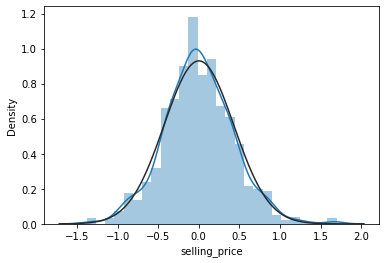

In [14]:
#model testing:

pred = rfr_random.predict(x_test)

error = y_test - pred

print('Residuals Kurtosis:', error.kurt(),'Residuals skewness:', error.skew())
print()
sns.distplot(error, fit = norm)

Final model R2: 0.7154207636146219



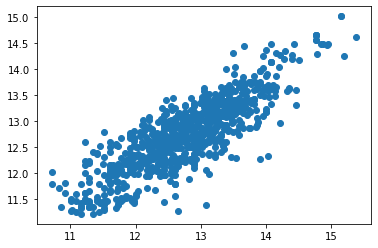

In [15]:
from sklearn.metrics import r2_score

print('Final model R2:', r2_score(y_test, pred))
print()
plt.scatter(y_test, pred)

In [16]:
#preparing for further model optimization with grid search cross validation

rfr_random.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [17]:
#grid search CV 

from sklearn.model_selection import GridSearchCV

rfgrid = RandomForestRegressor()

param_grid     = {'n_estimators': [500], #here I replace some hyper parameters with their best found by Random search CV for efficiency
                  'max_features': ['sqrt'],
                  'max_depth': max_depth, 
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}

rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 10, verbose = True, scoring = 'neg_mean_squared_error')
rfr_grid.fit(x_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 22.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

Residuals Kurtosis: 1.0061441575977677 Residuals skewness: 0.258662724473596



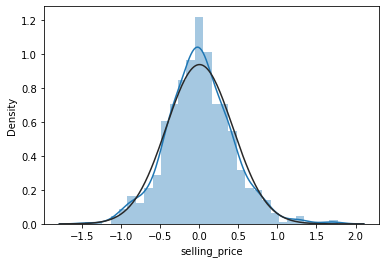

In [18]:
#testing the new model

prediction = rfr_grid.predict(x_test)

loss = y_test - prediction

print('Residuals Kurtosis:', loss.kurt(),'Residuals skewness:', loss.skew())
print()
sns.distplot(loss, fit = norm)

Final model R2: 0.7204884822823434



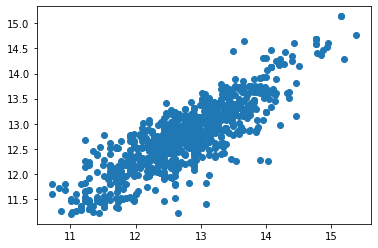

In [19]:
from sklearn.metrics import r2_score

print('Final model R2:', r2_score(y_test, prediction))
print()
plt.scatter(y_test, prediction)

In [22]:
#saving the optimized model for deployment phase

import pickle as plk

file = open('car_price_random_forest.pkl', 'wb')

plk.dump(rfr_grid, file)